1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

Ans- Boosting in Machine Learning is an ensemble technique that combines multiple weak learners sequentially to form a strong learner.

- Each weak learner focuses on correcting the mistakes of the previous one.

- This reduces bias and improves accuracy.

- Example: AdaBoost, Gradient Boosting, XGBoost.

✅ Boosting improves weak learners by making each new learner pay more attention to the misclassified samples, and then combining all learners into one powerful model.

2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
Ans-
AdaBoost (Adaptive Boosting):

- Trains weak learners sequentially.

- After each round, it changes sample weights: misclassified samples get higher weights, so the next learner focuses more on them.

- Final output is a weighted vote (classification) or weighted sum (regression).

Gradient Boosting:

- Also trains weak learners sequentially.

- Instead of changing sample weights, it fits each new learner to the residual errors (gradients) of the previous model.

- Uses gradient descent to minimize a chosen loss function (e.g., MSE, log loss).


3: How does regularization help in XGBoost?

Ans- Regularization in XGBoost controls the complexity of the model by penalizing overly complex trees. This prevents overfitting and improves generalization.

🔑 How it works:

- XGBoost’s objective function =
Loss Function (training error) + Regularization term

- The regularization term includes:

1. L1 regularization (α) → adds penalty on the number of leaf nodes with weights → encourages sparsity (some weights become zero).

2. L2 regularization (λ) → penalizes large leaf weights → prevents any single feature from dominating.

✅ Benefits of Regularization in XGBoost:

1. Prevents overfitting (trees don’t grow too complex).

2. Improves generalization on unseen data.

3. Reduces variance by shrinking leaf weights.

4. Encourages simpler, interpretable models.

4: Why is CatBoost efficient for handling categorical data?

CatBoost (by Yandex) is a gradient boosting library that is specially optimized for categorical features.

✅ Reasons why it is efficient:

1. No need for manual encoding (like One-Hot or Label Encoding).

-  CatBoost automatically handles categorical variables.

2. Uses “Ordered Target Statistics” instead of one-hot encoding:

-  Converts categories into numbers based on their relationship with the target (e.g., mean target value).

-  Prevents target leakage by using special ordered schemes.

3. Efficient with high-cardinality features (e.g., thousands of unique values in categorical columns).

4. Faster training & less memory usage since it avoids creating large sparse matrices (as in one-hot encoding).

5. Better accuracy on datasets with categorical features compared to XGBoost/LightGBM (if raw categorical features are used).

5: Real-World Applications where Boosting is preferred over Bagging

Boosting techniques (AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost) are preferred when:

- Data is complex

- Model needs high accuracy

- Misclassification is costly

✅ Real-World Applications of Boosting

1. Fraud Detection (Banking & Finance)

-  Detecting rare fraudulent transactions.

-  Boosting handles imbalanced datasets better than bagging.

2. Customer Churn Prediction (Telecom & SaaS)

-  Identifying which customers are likely to leave.

- Boosting captures subtle patterns in customer behavior.

3. Credit Risk Scoring (Loans & Insurance)

- Predicting loan defaults.

- Boosting improves precision and recall compared to bagging.

4. Medical Diagnosis (Healthcare)

- Disease prediction from patient history and scans.

- Boosting reduces false negatives, which is critical.

5. Search Engines & Recommendation Systems (Tech/Media)

- Ranking web pages (e.g., used in Microsoft’s RankNet, LambdaMART).

- Boosting is preferred for ranking problems.

6. Image & Text Classification (AI/ML Applications)

- Boosting (e.g., XGBoost + embeddings) is used in NLP and CV competitions.

In [ ]:
#6: Write a Python program to: ● Train an AdaBoost Classifier on the Breast Cancer dataset ● Print the model accuracy
# 📌 AdaBoost Classifier on Breast Cancer Dataset

# 1. Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 2. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Initialize AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

# 5. Train the model
ada.fit(X_train, y_train)

# 6. Predict on test set
y_pred = ada.predict(X_test)

# 7. Print model accuracy
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))




AdaBoost Classifier Accuracy: 0.9707602339181286


In [ ]:
#7: Write a Python program to: ● Train a Gradient Boosting Regressor on the California Housing dataset ● Evaluate performance using R-squared score
# 📌 Gradient Boosting Regressor on California Housing Dataset

# 1. Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# 2. Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42
)

# 5. Train the model
gbr.fit(X_train, y_train)

# 6. Predict on test set
y_pred = gbr.predict(X_test)

# 7. Evaluate performance using R² score
print("Gradient Boosting Regressor R² Score:", r2_score(y_test, y_pred))



Gradient Boosting Regressor R² Score: 0.804992915650479


In [ ]:
#8: Write a Python program to: ● Train an XGBoost Classifier on the Breast Cancer dataset ● Tune the learning rate using GridSearchCV ● Print the best parameters and accuracy
# 📌 XGBoost Classifier with GridSearchCV on Breast Cancer Dataset

# 1. Import libraries
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 2. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Define XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# 5. Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 6. Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 7. Best parameters
print("Best Parameters:", grid_search.best_params_)

# 8. Evaluate best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'learning_rate': 0.3}
Test Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:10:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.7 MB/s eta 0:00:00
CatBoost Classifier Accuracy: 0.9649122807017544


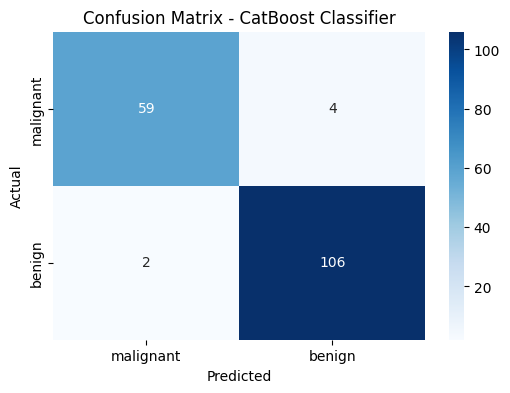

In [ ]:
#9: Write a Python program to: ● Train a CatBoost Classifier ● Plot the confusion matrix using seaborn
# 📌 CatBoost Classifier with Confusion Matrix

# 1. Install CatBoost (if not already installed in Colab)
!pip install catboost

# 2. Import libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Initialize and train CatBoost Classifier
cat_clf = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,        # suppress training logs
    random_state=42
)

cat_clf.fit(X_train, y_train)

# 6. Predictions
y_pred = cat_clf.predict(X_test)

# 7. Accuracy
print("CatBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 9. Plot Confusion Matrix with seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()



10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

Ans- 🔹 Loan Default Prediction using Boosting Techniques
1. Data Preprocessing

- Handle missing values:

  -  Numeric → impute with median

  -  Categorical → impute with mode (or let CatBoost handle directly)

- Encoding:

  -  AdaBoost/XGBoost → One-Hot for low-cardinality, Target/Label encoding for high-cardinality

 -  CatBoost → handles categorical features automatically ✅

- Scaling not required (tree-based models are scale-invariant).

2. Choice of Boosting Technique

- AdaBoost → simple datasets, less effective with categorical/missing data

- XGBoost → fast, optimized, but requires encoding for categorical features

- CatBoost → best choice here ✅ because it:

 -  Handles categorical features directly

 -  Handles missing values

 -  Works well with imbalanced datasets

 👉 Final choice: CatBoost

3. Hyperparameter Tuning

Use GridSearchCV / RandomizedSearchCV with cross-validation.
Key parameters to tune:

- learning_rate → [0.01, 0.05, 0.1]

- depth → [4, 6, 8, 10]

- iterations → [200, 500, 1000]

- l2_leaf_reg → [1, 3, 5, 7]

- class_weights (or scale_pos_weight in XGBoost) → to handle imbalance

4. Evaluation Metrics

Since the dataset is imbalanced, accuracy is misleading.
Better metrics:

- AUC-ROC → ability to separate defaulters vs non-defaulters

- Precision, Recall, F1-score → balance false positives/false negatives

- Confusion Matrix → business insight (how many defaults detected/missed)

👉 Final metric to report: AUC-ROC + F1-score

5. Business Value

- Reduce loan defaults → lower financial risk

- Better credit scoring → smarter approval/rejection decisions

- Profitability → approve safe customers, reject risky ones

- Customer retention → create repayment plans for borderline cases

👉 Overall: Boosting models help the company minimize risk and maximize profitability.